In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
meta = pd.read_csv("../../metadata/supp1_tab2.csv")
meta.columns

In [4]:
meta.geographic_cohort.dropna().unique()

array(['Ghana_Northern-Region', 'Gabon_Haut-Ogooue', 'CAR_Ombella-MPoko',
       'Cameroon_Adamawa', 'Ghana_Ashanti-Region',
       'Malawi_Southern-Region', 'Mozambique_Maputo',
       'Uganda_Eastern-Region', 'Benin_Atlantique-Dept', 'DRC_Kinshasa',
       'Nigeria_Ogun-State', 'Zambia_Eastern-Prov', 'Kenya_Nyanza-Prov',
       'Kenya_Western-Prov', 'Tanzania_Morogoro-Region', 'DRC_Haut-Uele',
       'Mozambique_Cabo-Delgado'], dtype=object)

In [7]:
#desired order of cohorts
geo_cohorts = ['Benin_Atlantique-Dept', 'Ghana_Ashanti-Region', 'Nigeria_Ogun-State', 
               'Cameroon_Adamawa', 'CAR_Ombella-MPoko', 'DRC_Haut-Uele',
               'Uganda_Eastern-Region', 'Kenya_Western-Prov', 'Kenya_Nyanza-Prov',
               'Gabon_Haut-Ogooue', 'DRC_Kinshasa', 'Tanzania_Morogoro-Region', 
               'Mozambique_Cabo-Delgado', 'Zambia_Eastern-Prov', 
               'Malawi_Southern-Region', 'Mozambique_Maputo']

In [26]:
colordict = dict(meta[['geographic_cohort', 'geographic_cohort_colour']].drop_duplicates().values)
colordict

{'Ghana_Northern-Region': '#2ca02c',
 'Gabon_Haut-Ogooue': '#ff7f0e',
 'CAR_Ombella-MPoko': '#ff9896',
 'Cameroon_Adamawa': '#d62728',
 'Ghana_Ashanti-Region': '#2ca02c',
 'Malawi_Southern-Region': '#1f77b4',
 'Mozambique_Maputo': '#17becf',
 'Uganda_Eastern-Region': '#c5b0d5',
 'Benin_Atlantique-Dept': '#d1985a',
 'DRC_Kinshasa': '#e377c2',
 'Nigeria_Ogun-State': '#d2691e',
 'Zambia_Eastern-Prov': '#7bccc4',
 'Kenya_Nyanza-Prov': '#9467bd',
 'Kenya_Western-Prov': '#9467bd',
 'Tanzania_Morogoro-Region': '#aec7e8',
 'DRC_Haut-Uele': '#e377c2',
 'Mozambique_Cabo-Delgado': '#17becf'}

In [61]:
#load data for all chromosomes
data_2 = np.load("windowed_H12_geo_cohort_2RL.npy", allow_pickle=True).flatten()[0]
data_3 = np.load("windowed_H12_geo_cohort_3RL.npy", allow_pickle=True).flatten()[0]
data_x = np.load("windowed_H12_geo_cohort_X.npy", allow_pickle=True).flatten()[0]

In [62]:
#check what the data looks like for Benin cohort
data_2[geo_cohorts[0]]

(array([0.03777778, 0.03888889, 0.05555556, ..., 0.05388889, 0.02833333,
        0.02611111]),
 array([9.10783410e+04, 1.16136353e+05, 1.36513613e+05, ...,
        1.02675700e+08, 1.02698807e+08, 1.02724550e+08]))

In [112]:
def plot_h12(geo_cohorts, colordict,
            data_2, data_3, data_x):
    
    fig, ax = plt.subplots(len(geo_cohorts), 3, 
                           figsize=(10,4.5),
                                       #approximate widths of accessible chromosomes
                           gridspec_kw={'width_ratios': [105,84,20],
                            #make the last row a little larger to allow for the ax labels
                            'height_ratios': np.repeat([1,1.15],[len(geo_cohorts)-1,1])}, 
                          sharex='col', sharey='row')
    
    for column, data in enumerate([data_2, data_3, data_x]):
        for row, cohort in enumerate(geo_cohorts):
            #positions in Mb vs H12 value
            ax[row, column].plot(data[cohort][1]/1000000, 
                                 data[cohort][0],
                                c = colordict[cohort], 
                                linewidth=.8, 
                                label=cohort)
            #set all the same height
            ax[row, column].set_ylim(0,.4)
            #remove boxes
            ax[row, column].spines[['left','right','top','bottom']].set_visible(False)
            #remove axes where necessary
            if column>0:
                ax[row,column].yaxis.set_visible(False)
            if row<15:
                ax[row,column].xaxis.set_visible(False)
            #replot axes where necessary
            if row==15:
                ax[row, column].spines[['bottom']].set_visible(True)
            if column==0:
                ax[row, column].spines[['left']].set_visible(True)
                ax[row, column].set_xlim(0,103)
                ax[row, column].set_yticks([0,.2,.4],['','',''])
            if column==1:
                ax[row, column].set_xlim(0,85)
            if column==2:
                ax[row, column].set_xlim(0,22)
    
    fig.tight_layout()
    plt.savefig('h12.svg')
    
    

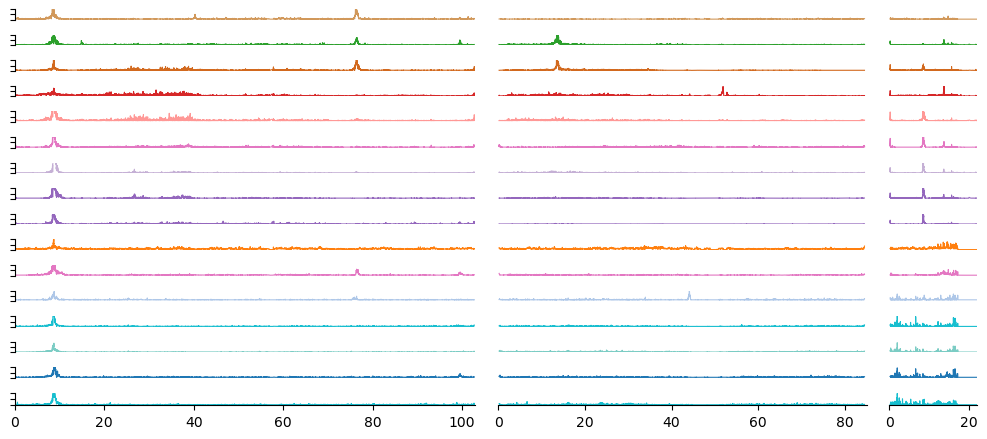

In [113]:
plot_h12(geo_cohorts, colordict,
         data_2, data_3, data_x)